<a href="https://colab.research.google.com/github/robertrose85/Webmining-Clustering/blob/main/KMeansClustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install sklearn

There are a ton of statistics for NFL players that go well beyond the typical yardage, touchdown total, receiving total, etc. For each position there are some advanced metrics that can tell a lot about a players ability that the normal stats simply ignore. For an NFL wide receiver, if you follow the sport, you probably know they catch the pass from the QB. Each caught pass is a reception and the distance from the line of scrimmage (where the ball is at the beginning of the play) to the point the wide receiver is brought down counts as yardage for both the wide receiver and the quarterback.

Let me give you an example that might help. The ball is on the 10 yard line. The play starts, the quarterback passes to the wide receiver who catches it at the 20 yard line, but he is finally tackled at the 30 yard line where the play ends. Despite where the wide receiver catches the ball, this is considered a 20 yard pass reception. But a lot can happen in those 10 yards between where the receiver catches the ball, and where they are finally brought down.

Introducing, Yards After Catch or YAC. This is a measurement of a players distance they travel once they catch the ball. This can tell you a lot about a player such as their speed, quickness, athletic ability, and even intelligence.

Not every wide receiver is built the same, and not every wide receiver can do the same as the next. So let's take a look at some of the YAC stats from 2020 and see if we can break down "types" of wide receivers.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

import pandas as pd
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt

To start, let's leave out wide receivers with less than 30 catches. 30 catches comes out to approximately 2 catches per game.

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/sportsref_download.csv')

df = df[df['Rec'] > 30]
df

,Rk,Player,Rec,YAC,YAC/R
0,1,Stefon Diggs*+,127,464,3.7
1,2,Davante Adams*+,115,597,5.2
2,3,DeAndre Hopkins*,115,534,4.6
3,4,Darren Waller*,107,572,5.3
4,5,Travis Kelce*+,105,587,5.6
...,...,...,...,...,...
143,144,Mo Alie-Cox,31,182,5.9
144,145,Dan Arnold,31,173,5.6
145,146,Chris Herndon,31,128,4.1
146,147,Jalen Reagor,31,191,6.2


Here is the scatter plot of receptions and YAC. As you can see there is a large cluster on the low end of the graph. At first glance, i'm going to say there are 2 clusters. 

<BarContainer object of 148 artists>

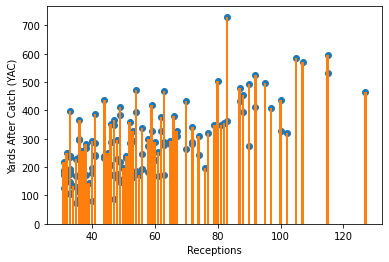

In [ ]:
plt.scatter(df.Rec, df.YAC)
plt.xlabel('Receptions')
plt.ylabel('Yards After Catch (YAC)')

plt.bar(df['Rec'], df['YAC'])

In [ ]:
km = KMeans(n_clusters=2)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

Here we will create an array of predicted clusters for each receiver using sk's fit_predict function.

In [ ]:
predicted = km.fit_predict(df[['Rec', 'YAC']])
predicted

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Let's append the predicted cluster to the dataframe so that we can see who might belong to each.

In [ ]:
df['Cluster'] = predicted
df

,Rk,Player,Rec,YAC,YAC/R,Cluster
0,1,Stefon Diggs*+,127,464,3.7,0
1,2,Davante Adams*+,115,597,5.2,0
2,3,DeAndre Hopkins*,115,534,4.6,0
3,4,Darren Waller*,107,572,5.3,0
4,5,Travis Kelce*+,105,587,5.6,0
...,...,...,...,...,...,...
143,144,Mo Alie-Cox,31,182,5.9,1
144,145,Dan Arnold,31,173,5.6,1
145,146,Chris Herndon,31,128,4.1,1
146,147,Jalen Reagor,31,191,6.2,1


Next let's replot so we can see where our initial analysis has taken us. As you can see, there is an awkward, near horizontal axis splitting the two clusters. While technically clustered, I don't think this tells us much.

No handles with labels found to put in legend.


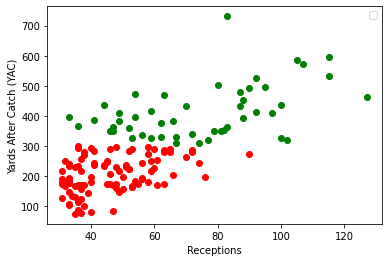

In [ ]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]

plt.scatter(df1.Rec,df1.YAC,color='green')
plt.scatter(df2.Rec,df2.YAC,color='red')

plt.xlabel('Receptions')
plt.ylabel('Yards After Catch (YAC)')
plt.legend()


First thing we can do is scale the data using the MinMaxScaler function. This will basically scale our data into a range of 0 to 1. This will help with our awkward axis.

In [ ]:
scaler = MinMaxScaler()

scaler.fit(df[['Rec']])
df['Rec'] = scaler.transform(df[['Rec']])

scaler.fit(df[['YAC']])
df['YAC'] = scaler.transform(df[['YAC']])

<BarContainer object of 148 artists>

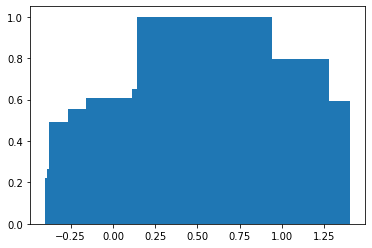

In [ ]:
plt.bar(df['Rec'], df['YAC'])

In [ ]:
df.head()

,Rk,Player,Rec,YAC,YAC/R,Cluster
0,1,Stefon Diggs*+,1.000000,0.592988,3.7,1
1,2,Davante Adams*+,0.875000,0.795732,5.2,1
2,3,DeAndre Hopkins*,0.875000,0.699695,4.6,1
3,4,Darren Waller*,0.791667,0.757622,5.3,1
4,5,Travis Kelce*+,0.770833,0.780488,5.6,1


In [ ]:
km = KMeans(n_clusters=2)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
predicted = km.fit_predict(df[['Rec', 'YAC']])
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [ ]:
km.cluster_centers_

array([[0.15246212, 0.23004435],
       [0.55811404, 0.52094031]])

In [ ]:
df['Cluster'] = predicted
df.head()

,Rk,Player,Rec,YAC,YAC/R,Cluster
0,1,Stefon Diggs*+,1.000000,0.592988,3.7,1
1,2,Davante Adams*+,0.875000,0.795732,5.2,1
2,3,DeAndre Hopkins*,0.875000,0.699695,4.6,1
3,4,Darren Waller*,0.791667,0.757622,5.3,1
4,5,Travis Kelce*+,0.770833,0.780488,5.6,1


As you can see, the axis makes a bit more sense now. The cluster no longer just splits between high YAC and low YAC, it seems to do a better job factoring in the number of receptions as well. But looking at this, I think we can drill down a bit deeper and really analyze some of these players, even the ones that maybe don't get much opportunity to play or were injured.

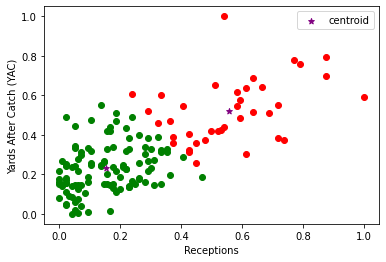

In [ ]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]

plt.scatter(df1.Rec,df1.YAC,color='green')
plt.scatter(df2.Rec,df2.YAC,color='red')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Receptions')
plt.ylabel('Yards After Catch (YAC)')
plt.legend()

We're going to use the elbow method to determine the number of appropriate clusters for our data.

In [ ]:
r = range(1,10)
sse = []

for k in r:
  km = KMeans(n_clusters=k)
  km.fit(df[['Rec', 'YAC']])
  sse.append(km.inertia_) #inertia finds the sum of square error, this appends it to the instantiated list

sse

[12.076091064829512,
 5.038610979122211,
 3.117951361405519,
 2.47625092542673,
 1.9493552217475079,
 1.6249842954644684,
 1.3105621056985024,
 1.1537192474586098,
 1.0262292370643873]

Something about SSE, use elbow plot and above results.


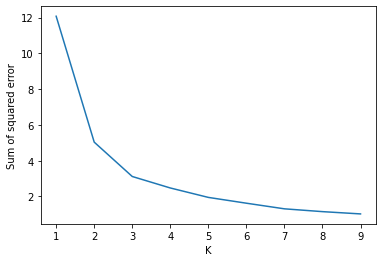

In [ ]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(r,sse)

In [ ]:
km = KMeans(n_clusters=5)
km

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
predicted = km.fit_predict(df[['Rec', 'YAC']])
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3,
       1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 3,
       3, 2, 2, 3, 2, 3, 0, 2, 2, 2, 2, 3, 2, 2, 2, 0, 2, 0, 2, 0, 2, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 0, 2, 0, 2, 4,
       0, 0, 2, 2, 0, 2, 2, 2, 0, 2, 2, 4, 0, 0, 4, 4, 0, 4, 4, 4, 4, 4,
       0, 0, 4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 0, 4, 0, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 0, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int32)

In [ ]:
df['Cluster'] = predicted
df.to_csv('clustered_players.csv')
df

,Rk,Player,Rec,YAC,YAC/R,Cluster
0,1,Stefon Diggs*+,1.000000,0.592988,3.7,1
1,2,Davante Adams*+,0.875000,0.795732,5.2,1
2,3,DeAndre Hopkins*,0.875000,0.699695,4.6,1
3,4,Darren Waller*,0.791667,0.757622,5.3,1
4,5,Travis Kelce*+,0.770833,0.780488,5.6,1
...,...,...,...,...,...,...
143,144,Mo Alie-Cox,0.000000,0.163110,5.9,4
144,145,Dan Arnold,0.000000,0.149390,5.6,4
145,146,Chris Herndon,0.000000,0.080793,4.1,4
146,147,Jalen Reagor,0.000000,0.176829,6.2,4


In [ ]:
km.cluster_centers_

array([[0.15541667, 0.41292683],
       [0.69133772, 0.62122914],
       [0.22424769, 0.19639228],
       [0.4070216 , 0.37223351],
       [0.04623984, 0.14277216]])

Expand the plot to include the additional clusters. Looking at the graph it appears we have a clear partition of the types of wide receivers.

In red, we have our superstars. These are the leagues top performers in volume and/or YAC. No one here would be surprising to anyone who watches the NFL.

In Blue, we have our secondary guys. These players are like the superstars, but they are not the primary on their team. They see a good amount of volume and often times turn it into a decent gain with their YAC. These are most likely wide receivers again, but can be mixed in with Tight End's or Running backs.

Cyan is where this get's interesting. These are low pass volume players who make the most out of the opportunities they get. These can include rookie wide receivers, maybe even slot receivers, but most likely Running Backs. Running backs generally have the skill to catch the ball and make tacklers miss, increasing their YAC. Running Backs that catch are becoming increasingly valuable in the NFL and this cluster might just show why. If you are a fantasy football player or a pro football coach, it may make sense to keep an eye on these guys as they can be stars (if they aren't already). Although, keep in mind, some of these guys can be starting players who started the season injured or became injured.

In black, you have guys who get fairly low volume, and generally don't do much after the catch. This is likely where a bulk of your Tight End will fall. They can make catches at a decent amount of volume, but are typically much slower than your average wide receiver or running back.

In green, again you have low volume, low YAC, this can be an indicator of receivers further down the depth chart or again, tight ends who get used in passing situations only a handful of times, or running backs who aren't known for the their pass catching prowess.

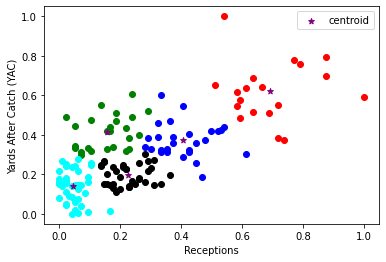

In [ ]:
df1 = df[df.Cluster==0]
df2 = df[df.Cluster==1]
df3 = df[df.Cluster==2]
df4 = df[df.Cluster==3]
df5 = df[df.Cluster==4]

plt.scatter(df1.Rec,df1.YAC,color='green')
plt.scatter(df2.Rec,df2.YAC,color='red')
plt.scatter(df3.Rec,df3.YAC,color='black')
plt.scatter(df4.Rec,df4.YAC,color='blue')
plt.scatter(df5.Rec,df5.YAC,color='cyan')

plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Receptions')
plt.ylabel('Yards After Catch (YAC)')
plt.legend()